### EDA (Exploratory Data Analysis)
Luego del proceso de Extracción, Transformación y Carga (ETL) 
procederemos al Análisis Exploratorio de Datos (EDA)

## Importamos librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import calendar
import folium
from IPython.display import Image

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

## Cargamos los datos resultantes de ETL

In [3]:
homicidios_df = pd.read_csv('homicidios_cleaned.csv')
homicidios_df.head(3)

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad
0,2016-0001,1,2016-01-01,4.0,avenida,8,-58.47533969,-34.68757022,moto,auto,conductor,masculino,19.0
1,2016-0002,1,2016-01-02,1.0,gral paz,9,-58.50877521,-34.66977709,auto,pasajeros,conductor,masculino,70.0
2,2016-0003,1,2016-01-03,7.0,avenida,1,-58.39040293,-34.63189362,moto,auto,conductor,masculino,30.0


In [3]:
homicidios_df.shape
homicidios_df.replace(['sd', 'SD'], pd.NA, inplace=True)

In [17]:
# Convertir las columnas 'longitud' y 'latitud' a tipo numérico
homicidios_df['longitud'] = pd.to_numeric(homicidios_df['longitud'], errors='coerce')
homicidios_df['latitud'] = pd.to_numeric(homicidios_df['latitud'], errors='coerce')

# Buscar filas con longitud mayor a -58 o latitud mayor a -34
filas_condicionadas = homicidios_df[(homicidios_df['longitud'] > -58)]

# Imprimir las filas encontradas
print(filas_condicionadas)



Empty DataFrame
Columns: [id_siniestro, nro_victimas, fecha, franja_hora, tipo_calle, comuna, longitud, latitud, vehiculo_victima, vehiculo_acusado, rol, sexo, edad]
Index: []


In [19]:
# Buscar filas con latitud o longitud NaN o nulas
filas_faltantes = homicidios_df[homicidios_df['latitud'].isna() | homicidios_df['longitud'].isna()]

# Imprimir las filas encontradas
print(filas_faltantes)



    id_siniestro  nro_victimas       fecha  franja_hora tipo_calle  comuna  \
39     2016-0052             1  2016-04-20         20.0  autopista      13   
108    2016-0136             1  2016-10-25          0.0  autopista       4   
121    2016-0151             1  2016-11-18         20.0      calle       0   
141    2016-0174             1  2016-12-27          0.0  autopista       0   
182    2017-0042             1  2017-04-10          9.0   gral paz      14   
186    2017-0050             2  2017-04-28         11.0  autopista       9   
187    2017-0050             2  2017-04-28         11.0  autopista       9   
188    2017-0051             1  2017-05-01          3.0  autopista       7   
266    2017-0140             1  2017-11-19         23.0  autopista       4   
327    2018-0039             1  2018-04-21         22.0  autopista      14   
564    2020-0026             1  2020-05-17          6.0  autopista      14   
578    2020-0039             1  2020-09-01         19.0      cal

In [20]:

# Filtrar las filas sin valores nulos o NaN en latitud y longitud
homicidios_df_sin_faltantes = homicidios_df.dropna(subset=['latitud', 'longitud'])

# Crear un nuevo DataFrame con el promedio de latitud y longitud por comuna
promedio_lat_long_por_comuna = homicidios_df_sin_faltantes.groupby('comuna').agg({
    'latitud': 'mean',
    'longitud': 'mean'
}).reset_index()

# Imprimir el nuevo DataFrame sin filas faltantes
print(homicidios_df_sin_faltantes)

# Imprimir el nuevo DataFrame con el promedio de latitud y longitud por comuna
print(promedio_lat_long_por_comuna)


    id_siniestro  nro_victimas       fecha  franja_hora tipo_calle  comuna  \
0      2016-0001             1  2016-01-01          4.0    avenida       8   
1      2016-0002             1  2016-01-02          1.0   gral paz       9   
2      2016-0003             1  2016-01-03          7.0    avenida       1   
3      2016-0004             1  2016-01-10          0.0    avenida       8   
4      2016-0005             1  2016-01-21          5.0    avenida       1   
..           ...           ...         ...          ...        ...     ...   
712    2021-0093             1  2021-12-13         17.0    avenida       7   
713    2021-0094             1  2021-12-20          1.0  autopista       9   
714    2021-0095             1  2021-12-30          0.0    avenida      11   
715    2021-0096             1  2021-12-15         10.0    avenida       9   
716    2021-0097             1  2021-11-18          6.0      calle       1   

      longitud    latitud vehiculo_victima vehiculo_acusado  \


In [22]:
# Filtrar las filas sin valores nulos o NaN en latitud y longitud
homicidios_df_sin_faltantes = homicidios_df.dropna(subset=['latitud', 'longitud'])

# Crear un nuevo DataFrame con el promedio de latitud y longitud por comuna
promedio_lat_long_por_comuna = homicidios_df_sin_faltantes.groupby('comuna').agg({
    'latitud': 'mean',
    'longitud': 'mean'
}).reset_index()

# Combinar el DataFrame original con los promedios por comuna
homicidios_df_combinado = pd.merge(homicidios_df, promedio_lat_long_por_comuna, on='comuna', how='left', suffixes=('', '_promedio'))

# Actualizar las filas con valores nulos en latitud o longitud con los promedios correspondientes
homicidios_df_combinado['latitud'] = homicidios_df_combinado['latitud'].fillna(homicidios_df_combinado['latitud_promedio'])
homicidios_df_combinado['longitud'] = homicidios_df_combinado['longitud'].fillna(homicidios_df_combinado['longitud_promedio'])

# Eliminar columnas auxiliares
homicidios_df_combinado = homicidios_df_combinado.drop(['latitud_promedio', 'longitud_promedio'], axis=1)

# Imprimir el DataFrame combinado y actualizado
print(homicidios_df_combinado)

homicidios_df = homicidios_df_combinado

    id_siniestro  nro_victimas       fecha  franja_hora tipo_calle  comuna  \
0      2016-0001             1  2016-01-01          4.0    avenida       8   
1      2016-0002             1  2016-01-02          1.0   gral paz       9   
2      2016-0003             1  2016-01-03          7.0    avenida       1   
3      2016-0004             1  2016-01-10          0.0    avenida       8   
4      2016-0005             1  2016-01-21          5.0    avenida       1   
..           ...           ...         ...          ...        ...     ...   
712    2021-0093             1  2021-12-13         17.0    avenida       7   
713    2021-0094             1  2021-12-20          1.0  autopista       9   
714    2021-0095             1  2021-12-30          0.0    avenida      11   
715    2021-0096             1  2021-12-15         10.0    avenida       9   
716    2021-0097             1  2021-11-18          6.0      calle       1   

      longitud    latitud vehiculo_victima vehiculo_acusado  \


In [24]:
# Buscar filas con latitud o longitud NaN o nulas
filas_faltantes = homicidios_df[homicidios_df['latitud'].isna() | homicidios_df['longitud'].isna()]

# Imprimir las filas encontradas
print(filas_faltantes)


    id_siniestro  nro_victimas       fecha  franja_hora tipo_calle  comuna  \
121    2016-0151             1  2016-11-18         20.0      calle       0   
141    2016-0174             1  2016-12-27          0.0  autopista       0   

     longitud  latitud vehiculo_victima vehiculo_acusado     rol sexo  edad  
121       NaN      NaN           peaton              NaN  peaton   sd   NaN  
141       NaN      NaN              NaN              NaN      sd   sd   NaN  


In [25]:
# Filtrar las filas donde 'comuna' no es igual a 0
homicidios_df = homicidios_df[homicidios_df['comuna'] != 0]

# Imprimir el DataFrame después de eliminar las filas
print(homicidios_df)


    id_siniestro  nro_victimas       fecha  franja_hora tipo_calle  comuna  \
0      2016-0001             1  2016-01-01          4.0    avenida       8   
1      2016-0002             1  2016-01-02          1.0   gral paz       9   
2      2016-0003             1  2016-01-03          7.0    avenida       1   
3      2016-0004             1  2016-01-10          0.0    avenida       8   
4      2016-0005             1  2016-01-21          5.0    avenida       1   
..           ...           ...         ...          ...        ...     ...   
712    2021-0093             1  2021-12-13         17.0    avenida       7   
713    2021-0094             1  2021-12-20          1.0  autopista       9   
714    2021-0095             1  2021-12-30          0.0    avenida      11   
715    2021-0096             1  2021-12-15         10.0    avenida       9   
716    2021-0097             1  2021-11-18          6.0      calle       1   

      longitud    latitud vehiculo_victima vehiculo_acusado  \


In [23]:
# Obtener el conteo de nulos por columna de homicidios_df
null_count = homicidios_df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (homicidios_df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro          0    0.000000
nro_victimas          0    0.000000
fecha                 0    0.000000
franja_hora           1    0.139470
tipo_calle            0    0.000000
comuna                0    0.000000
longitud              2    0.278940
latitud               2    0.278940
vehiculo_victima      9    1.255230
vehiculo_acusado     23    3.207810
rol                   0    0.000000
sexo                  0    0.000000
edad                 53    7.391911


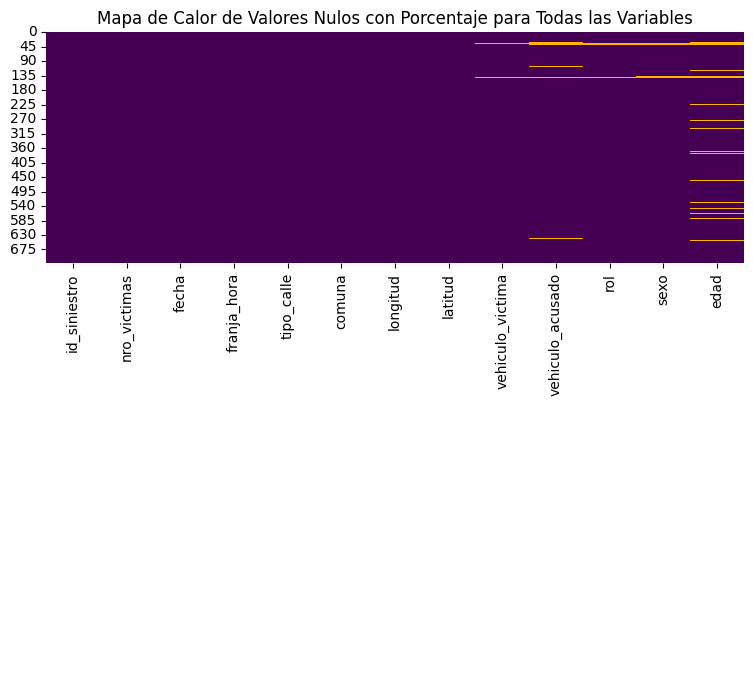

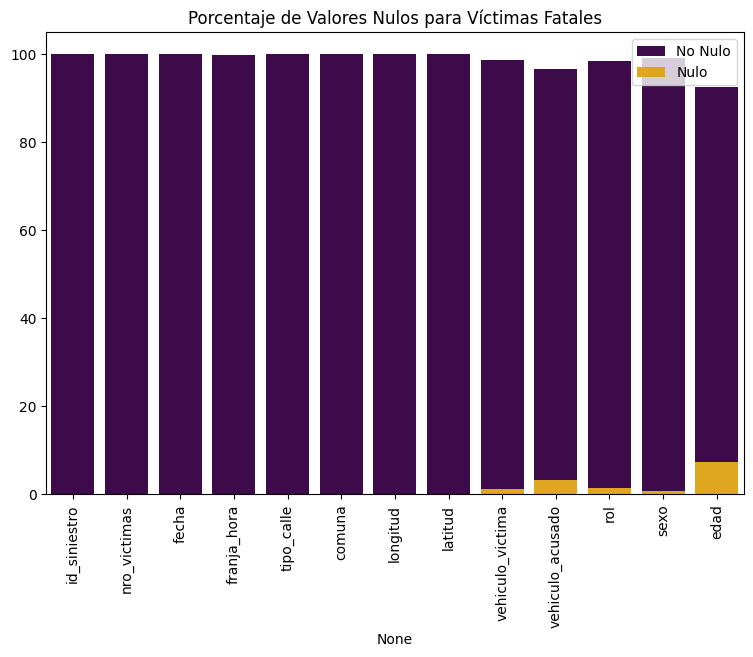

In [5]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = homicidios_df.isnull().mean() * 100

# Calcular el porcentaje de valores nulos por columna para víctimas fatales
porcentaje_nulos= homicidios_df.isnull().mean() * 100
# Crear una paleta de colores personalizada
cmap_custom = sns.color_palette(['#440154', '#FFB400'])

# Crear un mapa de calor (heatmap) de valores nulos con el porcentaje
plt.figure(figsize=(9, 3))
sns.heatmap(homicidios_df.isnull(), cbar=False, cmap=cmap_custom)

# Agregar el texto con el porcentaje de nulos en cada columna
for col, porcentaje in porcentaje_nulos.items():
    plt.text(homicidios_df.columns.get_loc(col) + 0.5, 1900, f'{porcentaje:.2f}%', rotation=90,
             va='center', ha='center', color='white')

plt.title('Mapa de Calor de Valores Nulos con Porcentaje para Todas las Variables')
plt.show()

# Crear la figura y los ejes para un solo gráfico
fig, ax = plt.subplots(figsize=(9, 6))

# Gráfico: Porcentaje de valores nulos para víctimas fatales
sns.barplot(x=porcentaje_nulos.index, y=100 - porcentaje_nulos.values, color=cmap_custom[0], label='No Nulo', ax=ax)
sns.barplot(x=porcentaje_nulos.index, y=porcentaje_nulos.values, color=cmap_custom[1], label='Nulo', ax=ax)
ax.set_title('Porcentaje de Valores Nulos para Víctimas Fatales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend()

# Mostrar la figura
plt.show()

In [28]:
# Guardamos los cambios en el archivo CVS
homicidios_df.to_csv('homicidios_cleaned.csv', index=False)


Como resultado del ETL , ralizando un analisis EDA poder ver que los datos estan listos para su uso